In [5]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [6]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

## Cleaning Train Data

In [7]:
# checking training data headers
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<AxesSubplot:>

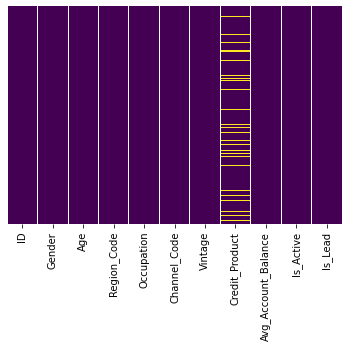

In [8]:
# visualizing missing training data (if any)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

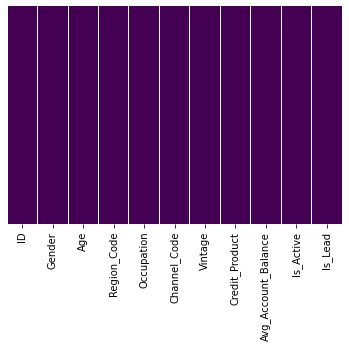

In [9]:
# replacing 'YES', 'NO' values by '1' and '0' in training data and filling the missing values with mean
train = train.replace(('Yes','No'),(1,0))
train = train.fillna(train.mean())
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,0.0,1045696,0,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,0.0,581988,0,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,0.0,1484315,1,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,0.0,470454,0,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,0.0,886787,0,0


In [11]:
# converting categorical features to dummy variables using pandas
gender = pd.get_dummies(train['Gender'],drop_first=True)
RCode = pd.get_dummies(train['Region_Code'],drop_first=True)
Occ = pd.get_dummies(train['Occupation'],drop_first=True)
CCode = pd.get_dummies(train['Channel_Code'],drop_first=True)

In [12]:
# dropping redundant feature columns after encoding 
train.drop(['ID','Gender','Region_Code','Occupation','Channel_Code'],axis=1,inplace=True)

In [13]:
# concatenating dataframes
train = pd.concat([train,gender,RCode,Occ,CCode],axis=1)

In [14]:
train.head()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Male,RG251,RG252,RG253,...,RG281,RG282,RG283,RG284,Other,Salaried,Self_Employed,X2,X3,X4
0,73,43,0.0,1045696,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,30,32,0.0,581988,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,56,26,0.0,1484315,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,34,19,0.0,470454,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,30,33,0.0,886787,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Cleaning Test Data

In [15]:
# checking testing data headers
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


<AxesSubplot:>

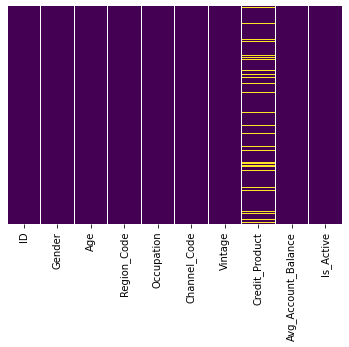

In [16]:
# visualizing missing testing data (if any)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

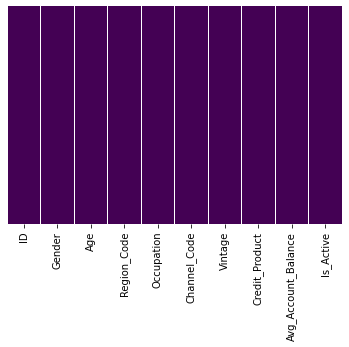

In [17]:
# replacing 'YES', 'NO' values by '1' and '0' in testing data and filling the missing values with mean
test = test.replace(('Yes','No'),(1,0))
test = test.fillna(test.mean())
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,1.000000,742366,0
1,CCMEWNKY,Male,43,RG268,Other,X2,49,0.336049,925537,0
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,0.000000,215949,0
3,TT8RPZVC,Male,29,RG272,Other,X1,33,0.000000,868070,0
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,0.000000,657087,0


In [19]:
# converting categorical features to dummy variables using pandas
gender = pd.get_dummies(test['Gender'],drop_first=True)
RCode = pd.get_dummies(test['Region_Code'],drop_first=True)
Occ = pd.get_dummies(test['Occupation'],drop_first=True)
CCode = pd.get_dummies(test['Channel_Code'],drop_first=True)

In [20]:
# dropping redundant feature columns after encoding 
ID = test['ID']
test.drop(['ID','Gender','Region_Code','Occupation','Channel_Code'],axis=1,inplace=True)

In [21]:
# concatenating dataframes
test = pd.concat([test,gender,RCode,Occ,CCode],axis=1)

In [22]:
test.head()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Male,RG251,RG252,RG253,RG254,...,RG281,RG282,RG283,RG284,Other,Salaried,Self_Employed,X2,X3,X4
0,29,25,1.000000,742366,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,43,49,0.336049,925537,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,31,14,0.000000,215949,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,29,33,0.000000,868070,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,29,19,0.000000,657087,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
print('Training Data Shape :',train.shape)
print('\nTesting Data Shape :',test.shape)

Training Data Shape : (245725, 47)

Testing Data Shape : (105312, 46)


In [24]:
X_train = train.drop(['Is_Lead'], axis=1)
X_test = test
y_train = train['Is_Lead']

In [25]:
print('Training Data Shape :',X_train.shape)
print('\nTesting Data Shape :',X_test.shape)

Training Data Shape : (245725, 46)

Testing Data Shape : (105312, 46)


## Building A Random Forest Model

In [26]:
# importing random forest classifier and creating an instance
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [28]:
# Optimizing Hyperparameters for Random Forest Algorithm

from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = [100,200,300,400,500] 

# max number of features to consider at every split
max_features = ['auto','sqrt','log2']

# max number of levels in a tree
max_depth = [10,20,30,40,50]
max_depth.append(None) 

# minimum number of samples required to split a node
min_samples_split = [2,5,10,15,20]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]

grid_param = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'max_features': max_features, 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

rfc_random = RandomizedSearchCV(estimator = rfc,
                                param_distributions = grid_param, 
                                n_iter = 100, cv = 5, verbose = 2, random_state = 42,
                                n_jobs = -1)

In [29]:
rfc_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 179.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 460.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 647.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [30]:
rfc_pred = rfc_random.predict_proba(X_test)

In [31]:
rfc_pred

array([[0.96851415, 0.03148585],
       [0.20676177, 0.79323823],
       [0.95347739, 0.04652261],
       ...,
       [0.87765688, 0.12234312],
       [0.7984137 , 0.2015863 ],
       [0.96986979, 0.03013021]])

In [32]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 20,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': None}

## Saving Predictions to a csv file

In [33]:
ID = pd.DataFrame(ID)
ID.columns =['ID']
Is_lead = pd.DataFrame(rfc_pred[:,1])
Is_lead.columns =['Is_Lead']
det = pd.concat([ID, Is_lead], join = 'outer', axis = 1)
det.to_csv("Submission3.csv", index=False)